In [1]:
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline
import skimage
import skimage.transform
import cv2

## 1. data explore

(1024, 2048, 3) (1024, 2048, 3)


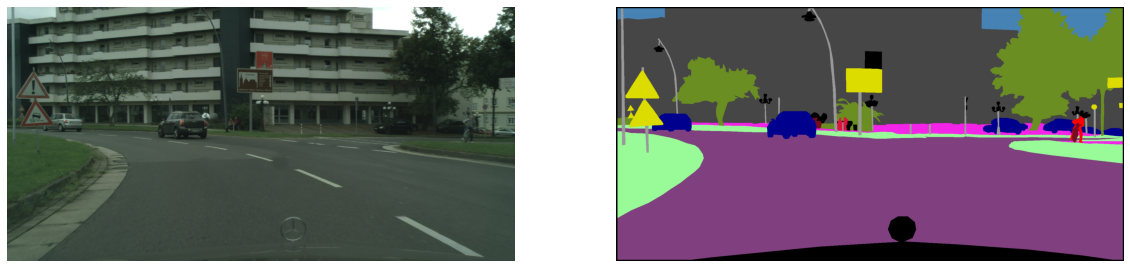

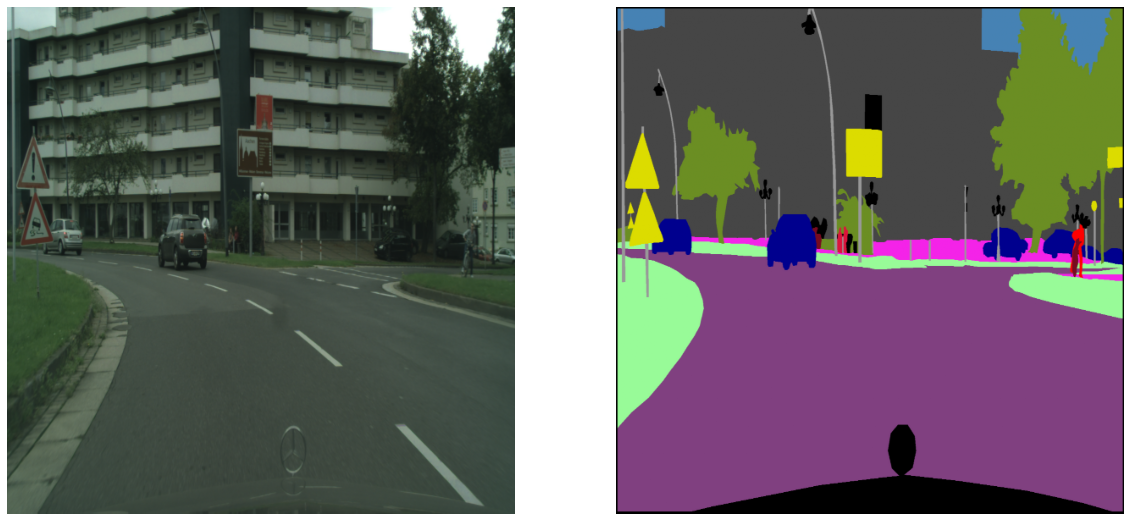

In [7]:
img1 = cv2.imread("../Data/Cityscapes/Cityspaces/images/train/aachen/aachen_000000_000019_leftImg8bit.png")
img2 = cv2.imread("../Data/Cityscapes/Cityspaces/gtFine/train/aachen/aachen_000000_000019_gtFine_color.png")
b,g,r = cv2.split(img1)
img1 = cv2.merge([r,g,b]) 
b,g,r = cv2.split(img2)
img2 = cv2.merge([r,g,b])


print(img1.shape,img2.shape)
plt.figure(figsize=(20,20))
plt.subplot(1, 2, 1)
plt.axis('off')
plt.imshow(img1)
plt.subplot(1, 2, 2)
plt.axis('off')
plt.imshow(img2)

img1 = skimage.transform.resize(img1, (600, 600, 3))
img2 = skimage.transform.resize(img2, (600, 600, 3))
plt.figure(figsize=(20,20))
plt.subplot(1, 2, 1)
plt.axis('off')
plt.imshow(img1)
plt.subplot(1, 2, 2)
plt.axis('off')
plt.imshow(img2)

## 2. Save as compressed numpy array

In [35]:
import os
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import load_img
from numpy import savez_compressed

src_images=[]; tar_images=[]
size=(256,256)

training_Source_Path = '../Data/Cityscapes/Cityspaces/images/train/'
training_Target_Path = '../Data/Cityscapes/Cityspaces/gtFine/train/'

allFileList = os.listdir(training_Source_Path)
count = 0

for FolderName in allFileList:
    FolderPath = os.path.join(training_Source_Path,FolderName)
    for picFile in os.listdir(FolderPath):
        sourcePath = os.path.join(FolderPath+"/",picFile)
        targetPath = sourcePath.replace("images","gtFine").replace("leftImg8bit","gtFine_color")
        pixels1 = load_img(sourcePath, target_size=size)
        pixels2 = load_img(targetPath, target_size=size)
        pixels1 = img_to_array(pixels1)
        pixels2 = img_to_array(pixels2)
        src_images.append(pixels1)
        tar_images.append(pixels2)
    
# save as compressed numpy array
filename = 'CityScapes_Training_DataSet.npz'
savez_compressed(filename, src_images, tar_images)
print('Saved dataset: ', filename)

Saved dataset:  CityScapes_Training_DataSet.npz


## 3. Load prepared dataset

Loaded:  (2975, 256, 256, 3) (2975, 256, 256, 3)


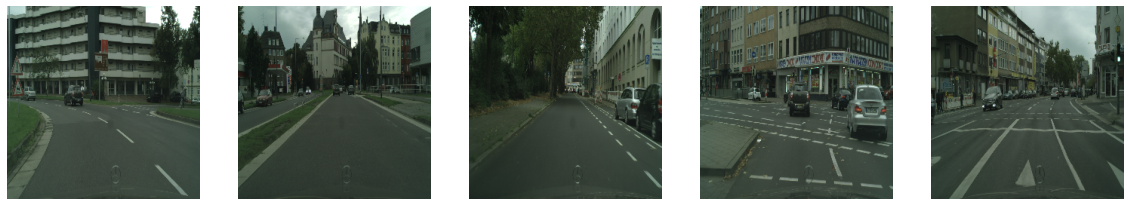

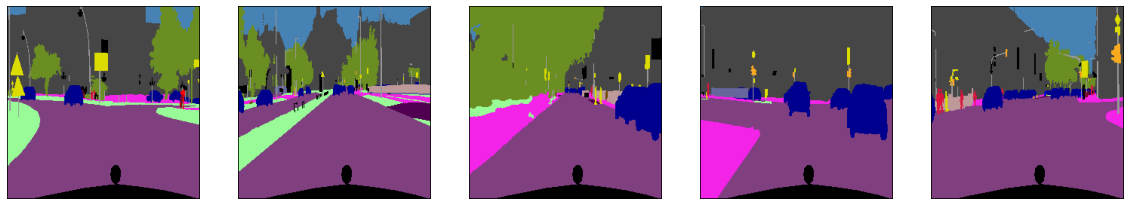

In [38]:
# load the prepared dataset
from numpy import load
import matplotlib.pyplot as plt
%matplotlib inline
# load the dataset
data = load('CityScapes_Training_DataSet.npz')
src_images, tar_images = data['arr_0'], data['arr_1']
print('Loaded: ', src_images.shape, tar_images.shape)
# plot source images
n_samples = 5
plt.figure(figsize=(20,20))
for i in range(n_samples):
    plt.subplot(2, n_samples, 1 + i)
    plt.axis('off')
    plt.imshow(src_images[i].astype('uint8'))
# plot target image
plt.figure(figsize=(20,20))
for i in range(n_samples):
    plt.subplot(2, n_samples, 1 + n_samples + i)
    plt.axis('off')
    plt.imshow(tar_images[i].astype('uint8'))